## Exploring TimeSeries Data

In [1]:
# import initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('data/zillow_data.csv')

In [3]:
# aggregate our data to explore
def melt_group_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName', 'RegionID', 'SizeRank'], var_name='date')
    melted['date'] = pd.to_datetime(melted['date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('date').aggregate({'value':'mean'})

In [4]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName', 'RegionID', 'SizeRank'], var_name='date')
    melted['date'] = pd.to_datetime(melted['date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [5]:
average_prices = melt_group_data(df)

In [6]:
average_prices

,value
date,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312
...,...
2017-12-01,281095.320247
2018-01-01,282657.060382
2018-02-01,284368.688447


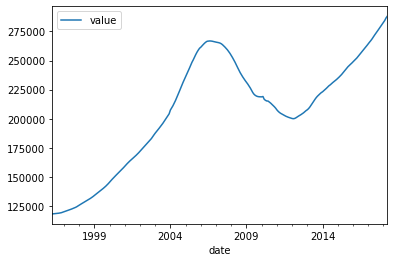

In [7]:
average_prices.plot();

In [8]:
melted = melt_data(df)

In [9]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3744704 entries, 0 to 3901594
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   RegionName  int64         
 1   City        object        
 2   State       object        
 3   Metro       object        
 4   CountyName  object        
 5   RegionID    int64         
 6   SizeRank    int64         
 7   date        datetime64[ns]
 8   value       float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 285.7+ MB


In [10]:
melted.isna().sum()

RegionName         0
City               0
State              0
Metro         236023
CountyName         0
RegionID           0
SizeRank           0
date               0
value              0
dtype: int64

In [11]:
melted.set_index(melted['date'], inplace=True)
melted.drop(['date', 'Metro', 'RegionID'], axis=1, inplace=True)

In [12]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744704 entries, 1996-04-01 to 2018-04-01
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   RegionName  int64  
 1   City        object 
 2   State       object 
 3   CountyName  object 
 4   SizeRank    int64  
 5   value       float64
dtypes: float64(1), int64(2), object(3)
memory usage: 200.0+ MB


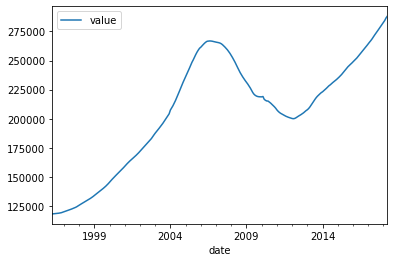

In [13]:
average_prices.plot();

In [14]:
melted_rolling = pd.DataFrame(melted['value'].rolling(12).mean())

In [15]:
melted_rolling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744704 entries, 1996-04-01 to 2018-04-01
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   value   float64
dtypes: float64(1)
memory usage: 57.1 MB


In [16]:
melted_rolling.isna().sum()

value    11
dtype: int64

In [17]:
melted_rolling.dropna(inplace=True)

In [18]:
from statsmodels.tsa.stattools import adfuller



def stationarity_check(df):
    roll_mean = df.rolling(window=12, center=False).mean()
    roll_std = df.rolling(window=12, center=False).std()
    
    df_test = adfuller(df)
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in df_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    roll_mean.plot()
    roll_std.plot()
    return df_test


In [19]:
melted = pd.DataFrame(melted['value'])
melted

,value
date,
1996-04-01,334200.0
1996-04-01,235700.0
1996-04-01,210400.0
1996-04-01,498100.0
1996-04-01,77300.0
...,...
2018-04-01,209300.0
2018-04-01,225800.0
2018-04-01,133400.0


In [24]:
timestamp = pd.to_datetime('4/1/2008')
timestamp

Timestamp('2008-04-01 00:00:00')

In [25]:
melted_ten_years = melted.loc[melted.index >= timestamp, :]
melted_ten_years

,value
date,
2008-04-01,865100.0
2008-04-01,211200.0
2008-04-01,249500.0
2008-04-01,1144100.0
2008-04-01,128300.0
...,...
2018-04-01,209300.0
2018-04-01,225800.0
2018-04-01,133400.0


In [22]:
#stationarity_check(melted_ten_years)

In [23]:
#results = stationarity_check(melted_rolling)
#results